<a href="https://colab.research.google.com/github/lonespear/MA206/blob/main/isaac_will_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
library(tidyverse)
df <- read_csv("ioct_west_point.csv")

Rows: 384 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): sex
dbl (3): height, weight, IOCT_Time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


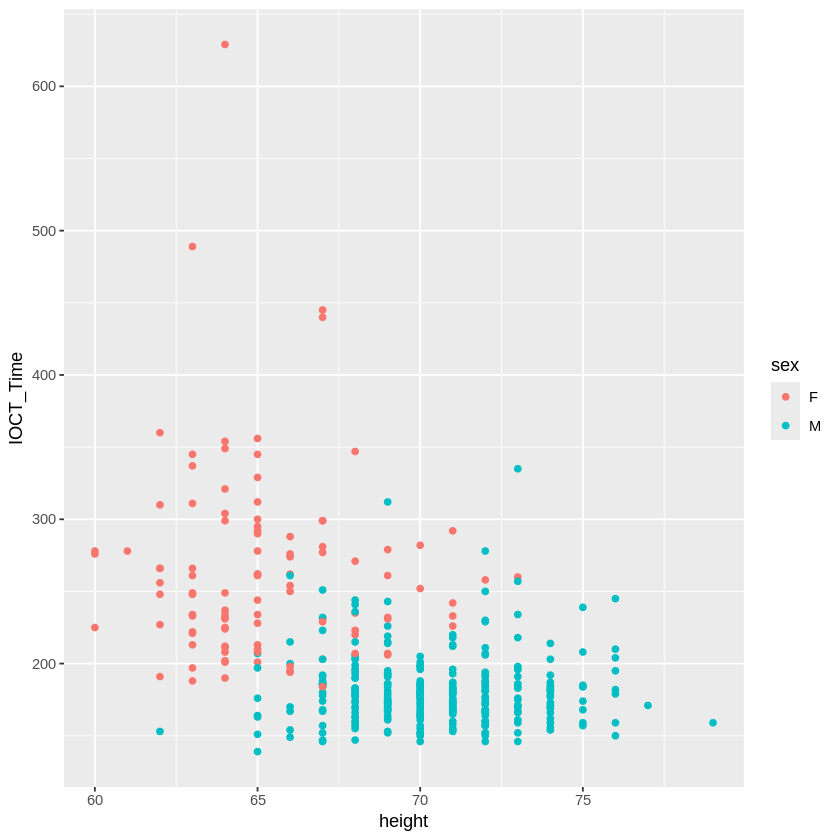

In [4]:
df %>% ggplot(aes(x=height, y=IOCT_Time, color=sex)) + geom_point()

In [5]:
model1 <- lm(IOCT_Time ~ height + weight + sex, data=df)
summary(model1)


Call:
lm(formula = IOCT_Time ~ height + weight + sex, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-82.39 -20.03  -4.61  12.66 344.36 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 370.5213    51.1653   7.242 2.48e-12 ***
height       -3.0491     0.8833  -3.452 0.000619 ***
weight        0.6503     0.1139   5.710 2.28e-08 ***
sexM        -89.5547     6.1971 -14.451  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 39.27 on 380 degrees of freedom
Multiple R-squared:  0.4904,	Adjusted R-squared:  0.4863 
F-statistic: 121.9 on 3 and 380 DF,  p-value: < 2.2e-16


In [6]:
model2 <- lm(IOCT_Time ~ height + weight*sex, data=df)
summary(model2)


Call:
lm(formula = IOCT_Time ~ height + weight * sex, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-91.84 -20.06  -4.57  12.06 321.37 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 272.4483    56.1027   4.856 1.75e-06 ***
height       -3.4635     0.8734  -3.965 8.76e-05 ***
weight        1.5289     0.2503   6.108 2.51e-09 ***
sexM         62.2939    39.1870   1.590 0.112746    
weight:sexM  -1.0164     0.2591  -3.923 0.000104 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 38.55 on 379 degrees of freedom
Multiple R-squared:  0.5102,	Adjusted R-squared:  0.5051 
F-statistic: 98.71 on 4 and 379 DF,  p-value: < 2.2e-16


In [7]:
model3 <- lm(IOCT_Time ~ height*sex + weight, data=df)
summary(model3)


Call:
lm(formula = IOCT_Time ~ height * sex + weight, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-80.70 -20.31  -4.69  13.38 343.27 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  432.7993    94.8658   4.562 6.85e-06 ***
height        -3.9937     1.4995  -2.663  0.00807 ** 
sexM        -177.5303   112.9942  -1.571  0.11698    
weight         0.6460     0.1141   5.662 2.96e-08 ***
height:sexM    1.3202     1.6931   0.780  0.43602    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 39.29 on 379 degrees of freedom
Multiple R-squared:  0.4912,	Adjusted R-squared:  0.4858 
F-statistic: 91.47 on 4 and 379 DF,  p-value: < 2.2e-16


In [8]:
model4 <- lm(IOCT_Time ~ height*sex + weight*sex, data=df)
summary(model4)


Call:
lm(formula = IOCT_Time ~ height * sex + weight * sex, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-88.486 -18.016  -4.853  12.383 300.217 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  560.2945    94.4843   5.930 6.84e-09 ***
height        -9.0707     1.7235  -5.263 2.38e-07 ***
sexM        -335.6404   112.8328  -2.975 0.003121 ** 
weight         2.0775     0.2863   7.257 2.26e-12 ***
height:sexM    7.4589     1.9878   3.752 0.000203 ***
sexM:weight   -1.6798     0.3101  -5.417 1.08e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 37.9 on 378 degrees of freedom
Multiple R-squared:  0.5278,	Adjusted R-squared:  0.5216 
F-statistic: 84.51 on 5 and 378 DF,  p-value: < 2.2e-16


In [11]:
install.packages("stargazer")
library(stargazer)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 




In [14]:
stargazer(model1, model2, model3, model4,
          type = "text",
          title = "Regression Results",
          align = TRUE,
          no.space = TRUE,
          column.labels = c("Model 1", "Model 2", "Model 3", "Model 4"))


Regression Results
                                                          Dependent variable:                                       
                    ------------------------------------------------------------------------------------------------
                                                               IOCT_Time                                            
                            Model 1                  Model 2                 Model 3                 Model 4        
                              (1)                      (2)                     (3)                     (4)          
--------------------------------------------------------------------------------------------------------------------
height                     -3.049***                -3.463***               -3.994***               -9.071***       
                            (0.883)                  (0.873)                 (1.500)                 (1.724)        
weight                      0.650***        

`geom_smooth()` using formula = 'y ~ x'


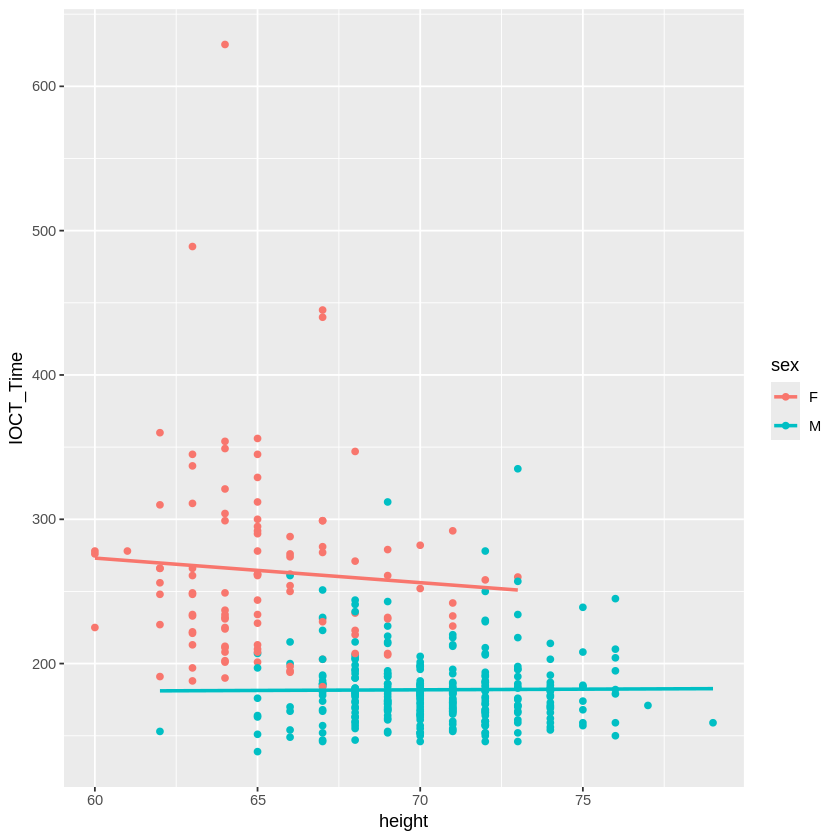

In [16]:
model4 %>%
fortify(model4$model) %>%
ggplot(aes(x = height, y = IOCT_Time, color = sex)) +
geom_point() +
geom_smooth(aes(y = .fitted), method="lm", se=FALSE)

`geom_smooth()` using formula = 'y ~ x'


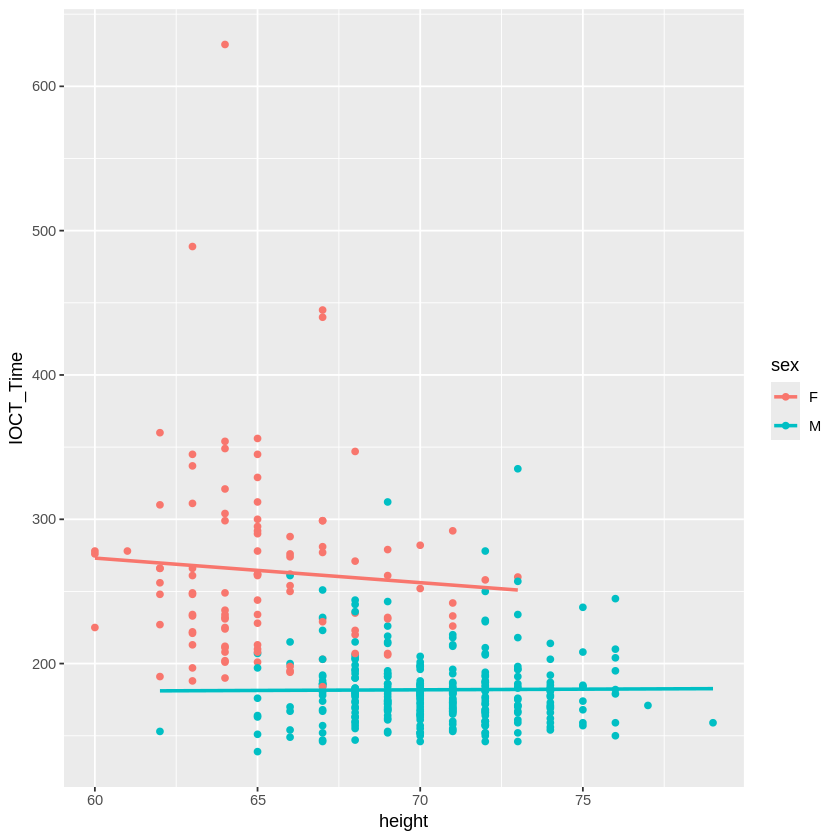

In [17]:
model3 %>%
fortify(model4$model) %>%
ggplot(aes(x = height, y = IOCT_Time, color = sex)) +
geom_point() +
geom_smooth(aes(y = .fitted), method="lm", se=FALSE)

`geom_smooth()` using formula = 'y ~ x'


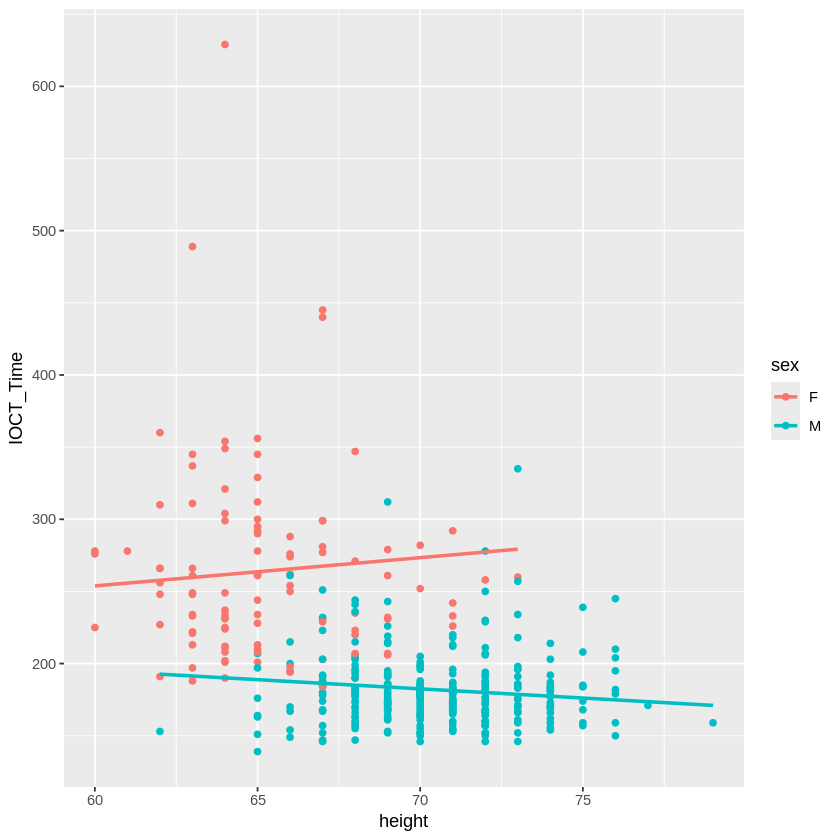

In [18]:
model2 %>%
fortify(model4$model) %>%
ggplot(aes(x = height, y = IOCT_Time, color = sex)) +
geom_point() +
geom_smooth(aes(y = .fitted), method="lm", se=FALSE)

`geom_smooth()` using formula = 'y ~ x'


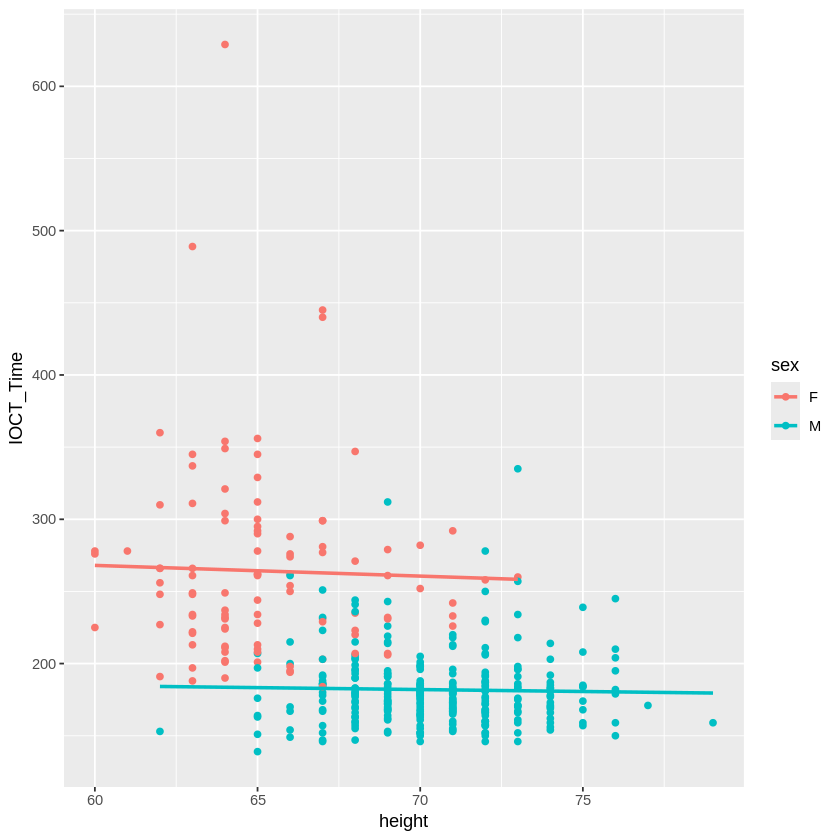

In [19]:
model1 %>%
fortify(model4$model) %>%
ggplot(aes(x = height, y = IOCT_Time, color = sex)) +
geom_point() +
geom_smooth(aes(y = .fitted), method="lm", se=FALSE)